# Projeto 2 - Presença de internet nos domicílios brasileiros
 
 
 ----
 

## Integrantes do grupo

- Pedro Berganton

- Daniel Djanikien

- Gabriel Buhrer


----
 

## Objetivo

Esse projeto tem como objetivo determinar se um domicílio, localizado no Brasil, *tem ou não acesso a internet(variável target)*, dadas diferentes variáveis presentes no banco de dados.
 
 
----


 
## Base de Microdados

Para o desenvolvimento desse projeto, foi utilizada a base de dados presente no arquivo 'tic_domicilios_2021.csv'. Esse arquivo reúne diversas informações a respeito do acesso a tecnologias da informação nos domicílios brasileiros. Há nele, um total de 61 colunas e 23950 linhas. Tendo isso em vista, visando diminuir a quantidade de colunas para facilitar o desenvolvimento do projeto, foram selecionadas 14 colunas. Abaixo, é apresentado cada uma das colunas escolhidas, o significado delas e, por fim, o motivo da escolha. Vale lembrar que cada linha da tabela é referente à uma residência.

   - `A4(Variável Target`) : A variável target é capaz de indicar se, em um determinado domicílio, *há ou não a presença de internet*.


   - `AREA` : indica a *área* na qual o domicílio se encontra. A localização geográfica pode influenciar a disponibilidade e a qualidade da infraestrutura de internet. Em áreas urbanas, é mais provável que haja acesso à internet em comparação com áreas rurais remotas.
       - 1 Urbano
       - 2 Rural
   
    
   * `RENDA_FAMILIAR_2` : indica a *renda familiar em salários mínimos* da residência. A renda familiar pode ser um indicador importante do acesso à internet, uma vez que a assinatura de serviços de internet pode exigir recursos financeiros. Domicílios com renda mais alta tendem a ter maior probabilidade de acesso à internet em comparação com aqueles com renda mais baixa.
       - 1 = "Até 1 SM"
       - 2 = "Mais de 1 SM até 2 SM"
       - 3 = "Mais de 2 SM até 3 SM"
       - 4 = "Mais de 3 SM até 5 SM"
       - 5 = "Mais de 5 SM até 10 SM"
       - 6 = "Mais de 10 SM"
       - 7 = "Não tem renda"
       - 97 = "Não sabe"
       - 98 = "Não respondeu"
   
 
   * `CLASSE_2015` : indica *qual a classe econômica* em que a residência está inserida. A classe econômica está relacionada à renda e ao padrão de vida. Grupos de classe média e alta têm maior probabilidade de possuir acesso à internet em comparação com aqueles de classes mais baixas.
       - 1 = "A"
       - 2 = "B"
       - 3 = "C"
       - 4 = "DE"
   
   
   * `COD_REGIAO_2`: indica  *em qual região* o domicílio está inserido. O acesso à internet pode variar em diferentes regiões do Brasil. Algumas regiões podem ter infraestrutura de internet mais desenvolvida, enquanto outras podem enfrentar desafios de conectividade. Portanto, a região geográfica pode ser um fator importante a ser considerado.
       - 1 = "Sudeste"
       - 2 = "Nordeste"
       - 3 = "Sul"
       - 4 = "Norte"
       - 5 = "Centro-Oeste"
   
   
   * `TV`, `DVD`  : indica o *a quantidade de aparelhos* no domicílio. Embora essas variáveis não estejam diretamente relacionadas ao acesso à internet, elas podem fornecer insights indiretos. Por exemplo, domicílios que possuem TV por assinatura ou antena parabólica podem ter maior probabilidade de também possuir acesso à internet.
       - 0 = "Não tem"
       - 1 = "1"
       - 2 = "2"
       - 3 = "3"
       - 4 = "4 ou mais"
   
   
   
   * `VIDEOGAME`, `TV_ASSINATURA`, `ANTENA_PARABOLICA`, `TELEFONE_FIXO`  : indica a *se há ou não há de cada um desses objetos no domicílio*. A justificativa de escolha dessas variáveis segue a mesma ideia da justificativa de `TV` e `DVD`.
       - 0 = "Não tem"
       - 1 = "Tem"
   
   
   * `A1_A`, `A1_B`, `A1_C`  : indica, respectivamente, se *tem ou não no domicílio computador de mesa, notebook e tablet*. Essas variáveis estão mais diretamente relacionadas à capacidade de acessar a internet. Domicílios que possuem computadores, notebooks ou tablets podem ter maior probabilidade de ter acesso à internet.
       - 0 = "Não"
       - 1 = "Sim"
       - 97 = "Não sabe"
       - 98 = "Não respondeu"
       
   

   * `A7A` : indica *a presença ou não de Wifi* na residência. A disponibilidade de conexão WiFi pode indicar a existência de uma infraestrutura adequada para acesso à internet no domicílio.
       - 0 = "Não"
       - 1 = "Sim"
       - 97 = "Não sabe"
       - 98 = "Não respondeu"
       - 99 = "Não se aplica"

 
 
 ## Abordagem
 
 A abordagem dessa análise será baseada em três grandes etapas:
 
>Análise exploratória
 
>Modelos de Classificação

In [43]:
# Importando as bibliotecas necessárias para esta atividade
import pandas as pd
import os
import matplotlib.pyplot as plt


In [44]:
print(f'Esperamos trabalhar no diretório: \n{os.getcwd()}\n')

Esperamos trabalhar no diretório: 
c:\Users\Dani2\OneDrive\Área de Trabalho\CDADOS_FINAL_PROJETO\23-1a-cd-p2-gabriel_pedro_daniel



## Análise exploratória das variáveis Qualitativas
Uma vez selecionada as colunas, é possível dar início a Análise exploratória do projeto. Nessa etapa, o principal objetivo é estudar as relações e as principais características entre as variáveis escolhidas. Essa análise será possível através da manipulação da base de dados e do "plot" de diversos gráficos. Por fim, será possivel enxergar padrões e/ou anomalias na base de dados.

In [45]:
df= pd.read_csv('tic_domicilios_2021.csv', sep=';')
df

,QUEST,ID_DOMICILIO,CLASSE_2015,AREA,TV,RADIO,BANHEIRO,AUTOMOVEL,EMPREGADA,LAVA_ROUPA,...,A1_EXCLUSIVOS,A2_A_FAIXA,A2_B_FAIXA,A2_C_FAIXA,A1A4,A7_AGREG,A5_NENHUM,A9_FAIXA,ESTRATO,UPA
0,159996083,1,2,1,3,0,3,1,0,1,...,99,0,2,2,1,1,99,9,2,434
1,159997713,2,4,1,1,1,1,0,0,0,...,99,0,0,0,3,1,99,9,2,434
2,160256684,3,3,1,2,1,1,1,0,0,...,99,0,0,0,3,99,99,4,2,434
3,160028756,4,3,1,2,0,2,0,0,1,...,99,0,0,0,3,99,99,9,2,434
4,160029637,5,4,1,0,0,1,0,0,1,...,99,0,0,0,3,99,99,2,2,434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23945,163182229,33141,3,1,1,1,1,0,0,1,...,2,0,1,0,1,99,99,7,88,1021
23946,163183056,33142,3,1,1,0,1,0,0,1,...,99,0,1,1,1,1,99,9,88,1021
23947,163186635,33143,2,1,1,1,1,1,0,1,...,99,1,1,0,1,1,99,9,88,1021
23948,163186636,33145,3,1,1,0,2,0,0,1,...,2,0,1,0,1,1,99,10,88,1021


In [46]:
df.loc[:,['A4']].value_counts()

A4
1     17404
0      6499
97       29
98       18
dtype: int64

In [47]:


lista2=['AREA','RENDA_FAMILIAR_2','CLASSE_2015','COD_REGIAO_2','TV','DVD','TELEFONE_FIXO','VIDEOGAME','TV_ASSINATURA','ANTENA_PARABOLICA','A1_A','A1_B','A1_C','A4','A7A']
df_novo = df.loc[:,['AREA','RENDA_FAMILIAR_2','CLASSE_2015','COD_REGIAO_2','TV','DVD','TELEFONE_FIXO','VIDEOGAME','TV_ASSINATURA','ANTENA_PARABOLICA','A1_A','A1_B','A1_C','A4','A7A']]



for nomes in lista2:
    df_novo[nomes] = df_novo[nomes].astype('category') 
#df_novo['A1_A'].value_counts()
df_novo.dtypes



lista_dos_A = ['A1_A','A1_B','A1_C','A4']

for valores in lista_dos_A:
    df_novo[valores].cat.categories = ['Não', 'Sim','Não sabe','Não respondeu']
    
 
df_novo['A7A'].cat.categories = ['Não','Sim','Não sabe', 'Não respondeu','Não se aplica']
df_novo['TV_ASSINATURA'].cat.categories = ['Não tem', 'Tem']
df_novo['ANTENA_PARABOLICA'].cat.categories = ['Não tem','Tem']
df_novo['VIDEOGAME'].cat.categories = ['Não tem','Tem']
df_novo['TELEFONE_FIXO'].cat.categories = ['Não tem','Tem']
df_novo['DVD'].cat.categories = ['Não tem','1','2','3','4 ou mais']
df_novo['TV'].cat.categories = ['Não tem','1','2','3','4 ou mais']
df_novo['AREA'].cat.categories = ['Urbana','Rural']
df_novo['COD_REGIAO_2'].cat.categories = ['Sudeste','Nordeste','Sul','Norte','Centro-Oeste']
df_novo['CLASSE_2015'].cat.categories = ['A','B','C','DE']
df_novo['RENDA_FAMILIAR_2'].cat.categories = ['Até 1 SM','Mais de 1 SM até 2 SM','Mais de 2 SM até 3 SM','Mais de 3 SM até 5 SM','Mais de 5 SM até 10 SM','Mais de 10 SM','Não tem renda','Não sabe','Não respondeu']



In [48]:

df_novo['A4'].value_counts()



Sim              17404
Não               6499
Não sabe            29
Não respondeu       18
Name: A4, dtype: int64

## Análise Exploratória

Depois de preparar os dados, é hora de realizar a análise exploratória. O objetivo é entender as relações e características principais. Usaremos cálculos matemáticos e gráficos para identificar padrões e anormalidades nos dados.

Com relação às variáveis utilizadas (qualitativas) do modelo (AREA, RENDA_FAMILIAR_2, CLASSE_2015, COD_REGIAO_2, TV, DVD, TELEFONE_FIXO,  VIDEOGAME, TV_ASSINATURA, ANTENA_PARABOLICA, A1_A, A1_B, A1_C, A7A), foram criados histogramas de frequência em relação à variável target (A4). 

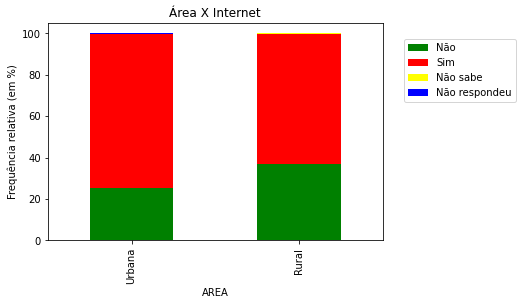

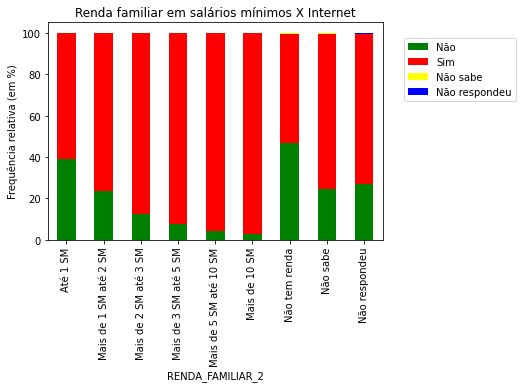

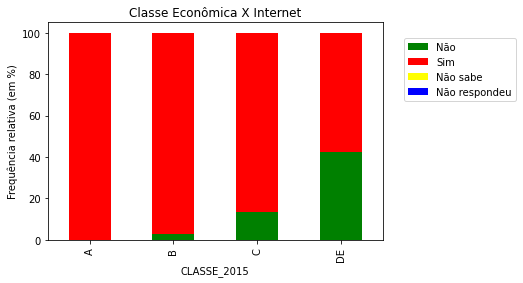

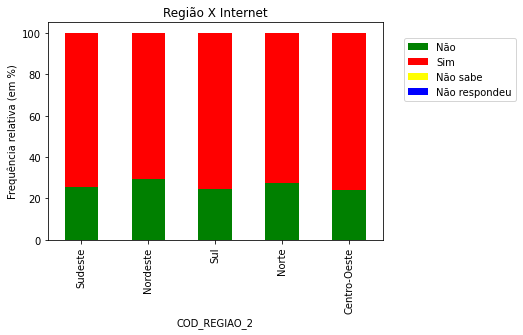

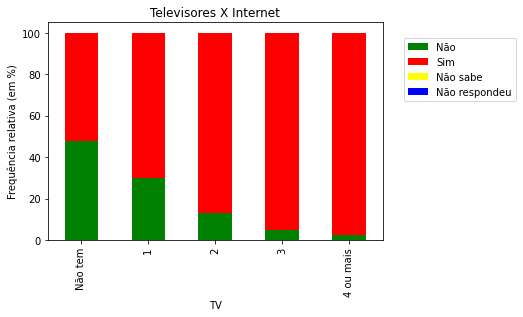

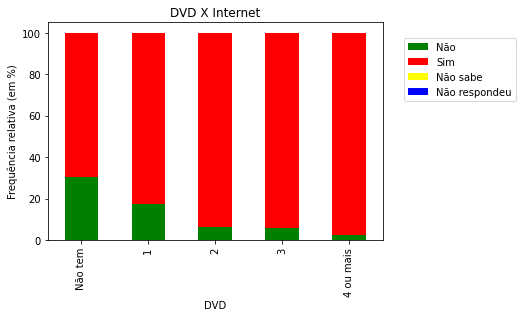

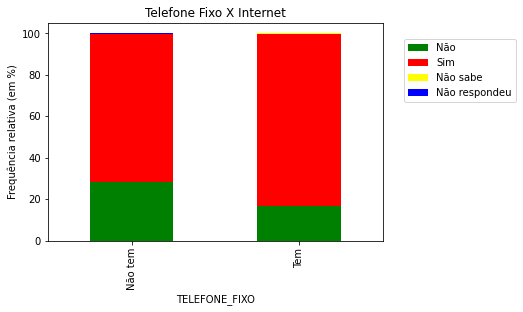

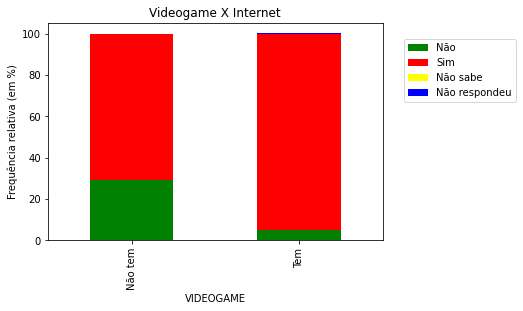

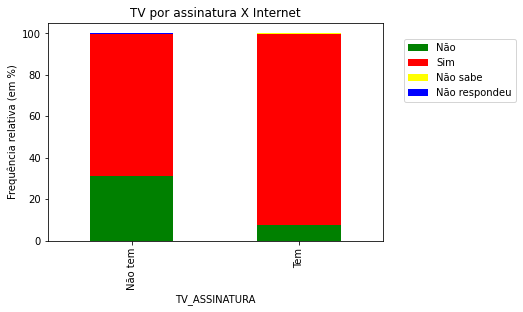

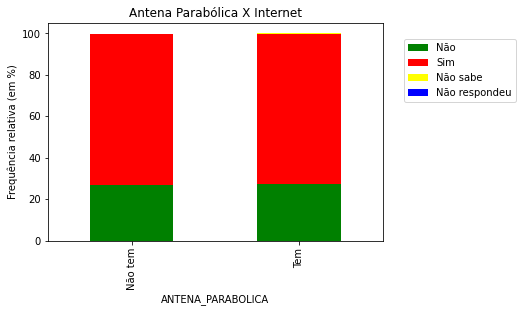

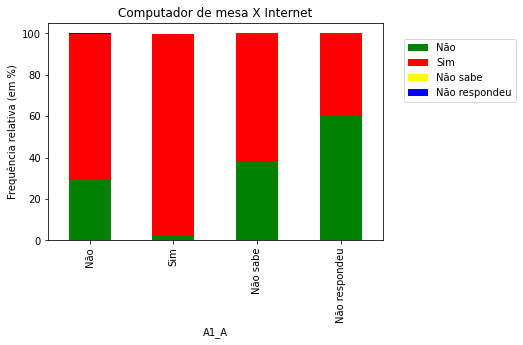

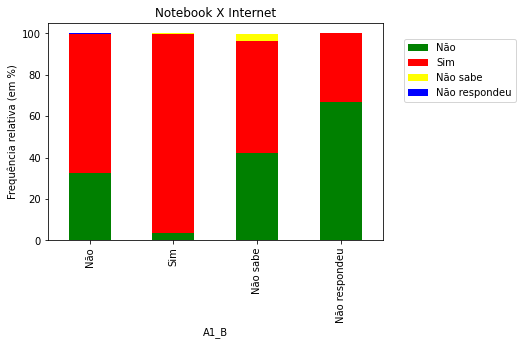

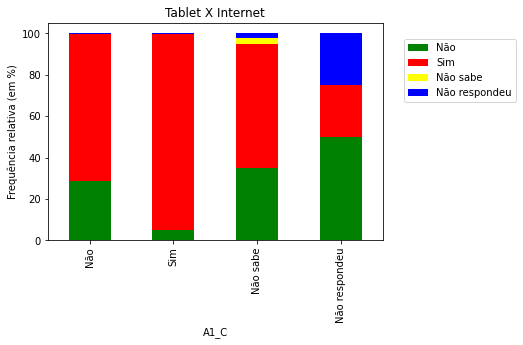

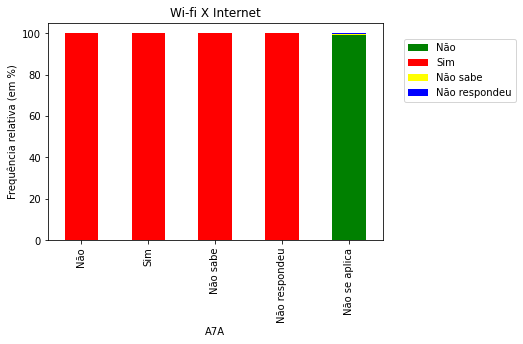

In [49]:
lista_graf = ['AREA','RENDA_FAMILIAR_2','CLASSE_2015','COD_REGIAO_2','TV','DVD','TELEFONE_FIXO','VIDEOGAME','TV_ASSINATURA','ANTENA_PARABOLICA','A1_A','A1_B','A1_C','A7A']
lista_legenda_var = ['Área','Renda familiar em salários mínimos','Classe Econômica','Região','Televisores','DVD','Telefone Fixo','Videogame','TV por assinatura','Antena Parabólica','Computador de mesa','Notebook','Tablet','Wi-fi']


for i in range (len(lista_graf)):
    quali_quali = pd.crosstab(df_novo[lista_graf[i]], df_novo['A4'], normalize= 'index').round(3)*100
    cores = ['green','red','yellow','blue']
    quali_quali.plot.bar(color = cores, stacked = True)
    plt.title(lista_legenda_var[i] + " " + "X" + " " + "Internet")
    plt.ylabel('Frequência relativa (em %)')
    plt.legend(loc='center')
    plt.legend(bbox_to_anchor=(1.05, 0.95))
    plt.show()




A partir da análise dos gráficos, é possível concluir o seguinte:


Variáveis que, aparentemente, não influenciam a variável target: Antena Parbólica

Variáveis que, aparentemente, possuem influência na variável target: Região, Telefone fixo, Área

Variáveis que, aparentemente, possuem muita influência na variável target: Wi-fi, Tablet, Notebook, Computador de Mesa, TV por assinatura, Videogame, DVD, Televisores, Classe econômica, Renda familiar 

## Modelos de Classificação
Já feita a análise exploratória, torna-se necessária a construção de modelos de classificação para chegar no objetivo final do projeto.

In [50]:
# Classificação de Predição

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm


regressao_logistica = LogisticRegression()

floresta_aleatoria = RandomForestClassifier(n_estimators=100,max_depth=10, random_state=42)

Os dois modelos de classificação escolhidos para a construção da análise são: Regressão Logística(LogisticRegression) e Floresta Aleatória(RandomForestClassifier). A escolha delas foi baseada nas pesquisas realizadas pelo grupo, nas quais pode-se concluir que, a Regressão Logística permite trabalhar diretamente com variáveis categóricas, sem precisar mudar para variável numérica. Além disso, esse modelo tem uma interpretação simples. Já a escolha do modelo Floresta Aleatoria justifica-se por tambem lidar com atributos categóricos e, por trabalhar com diversar "árvores", o modelo reduz o risco de overfitting. Assim, ambos atendem os preé-requisitos do projeto.

In [51]:
df_para_dummy = df.loc[:,['AREA','RENDA_FAMILIAR_2','CLASSE_2015','COD_REGIAO_2','TV','DVD','TELEFONE_FIXO','VIDEOGAME','TV_ASSINATURA','ANTENA_PARABOLICA','A1_A','A1_B','A1_C','A4']]
df_para_dummy = df_para_dummy.loc[df_para_dummy.A4<2,:]
y = df_para_dummy.loc[:, 'A4']
X = df_para_dummy.drop(['A4'], axis=1)

df_dummy = pd.get_dummies(X,drop_first=True)

  
X_train, X_test, y_train, y_test = train_test_split(
    df_dummy,
    y,                  
    test_size=0.4,
    random_state=42,
)
#model_sm = sm.Logit(y_train, sm.add_constant(X_train))
#result = model_sm.fit()
floresta_aleatoria.fit(X_train, y_train) 
regressao_logistica.fit(X_train, y_train)



c:\Users\Dani2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
floresta_aleatoria_previsao = floresta_aleatoria.predict(X_test)
regressao_logistica_previsao = regressao_logistica.predict(X_test)


#result_previsao = result.predict(X_test)


In [56]:
acuracia_floresta_aleatoria = accuracy_score(y_test,floresta_aleatoria_previsao)
acuracia_regressao_logistica = accuracy_score(y_test,regressao_logistica_previsao)
print('Acurácia do Random Forest: {:.2f}%'.format(acuracia_floresta_aleatoria*100))
print('Acurácia do Logistic Regression: {:.2f}%'.format(acuracia_regressao_logistica*100))

Acurácia do Random Forest: 74.85%
Acurácia do Logistic Regression: 73.85%


In [65]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [63]:
def display_scores(scores):
    print('Scores:', scores.round(decimals=2))
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [66]:
floresta_aleatoria_scores = cross_val_score(
    floresta_aleatoria,  # modelo
    X_train,  # X_train
    y_train,  # y_train
    scoring='neg_mean_squared_error',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)

rf_rmse_scores = np.sqrt(-floresta_aleatoria_scores)

display_scores(rf_rmse_scores)

Scores: [0.5  0.51 0.5  0.5  0.52 0.5  0.51 0.49 0.51 0.5 ]
Mean: 0.5046481639336479
Standard deviation: 0.007390495546696515


In [67]:
regressao_logistica_scores = cross_val_score(
    regressao_logistica,  # modelo
    X_train,  # X_train
    y_train,  # y_train
    scoring='neg_mean_squared_error',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)

lr_rmse_scores = np.sqrt(-regressao_logistica_scores)

display_scores(lr_rmse_scores)

Scores: [0.51 0.51 0.51 0.52 0.52 0.51 0.51 0.53 0.51 0.51]
Mean: 0.5156721086494456
Standard deviation: 0.005772428281448893
